In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from PIL import Image

from vector_mapping import VectorMap, map_hsl_image
from colour import hsl_square_grid, rgb_square_grid, hsl2rgb, rgb2hsl

In [17]:
%matplotlib notebook

In [3]:
px, py = [0.2, 0.4], [0.6, 0.6]
qx, qy = [0.5, 0.5], [0.7, 0.1]

px, py, qx, qy = np.atleast_1d(px, py, qx, qy)

wt = [1, 1]
gt = [0.3, 0.3]

x1, y1 = np.linspace(0, 1, 11), np.linspace(0, 1, 11)
x = np.meshgrid(x1, y1)

vm = VectorMap(px, py, qx, qy, wt, gt)

In [4]:
v = vm.velocity_func()

In [5]:
v(x).shape

(2, 11, 11)

<IPython.core.display.Javascript object>


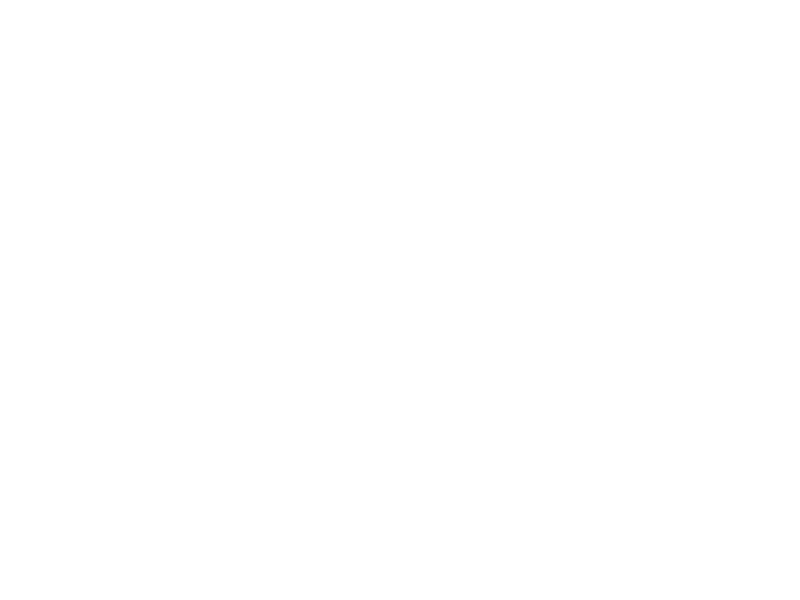

In [6]:
plt.quiver(*x, *v(x), color='blue', scale_units='xy')
plt.quiver(px, py, qx-px, qy-py, color='red', scale_units='xy', scale=1)

<IPython.core.display.Javascript object>


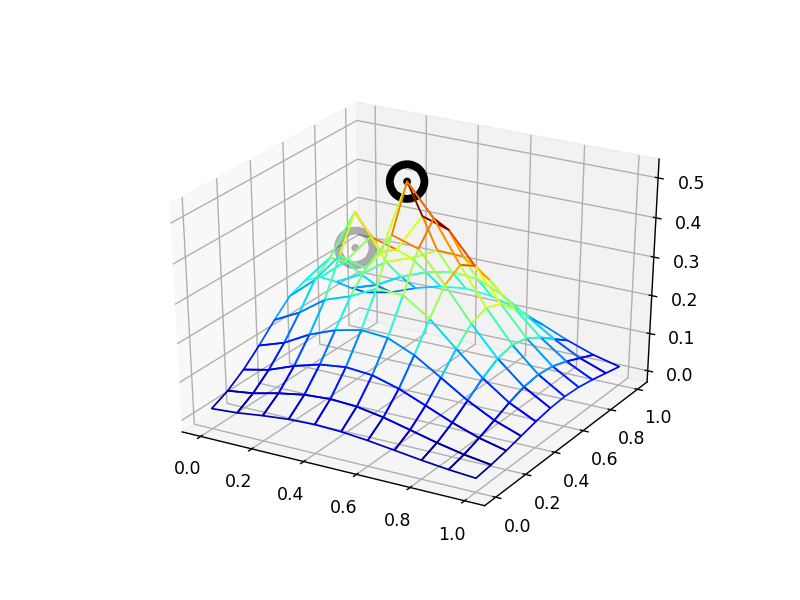

In [7]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(px, py, vm.sample_vector_magnitudes(), marker='o', color='black', linewidths=20)

vx = np.linalg.norm(v(x), axis=0)

# Normalize the colors based on Z value
norm = plt.Normalize(vx.min(), vx.max())
colors = cm.jet(norm(vx))
surf = ax.plot_surface(x[0], x[1], vx, facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))

<IPython.core.display.Javascript object>


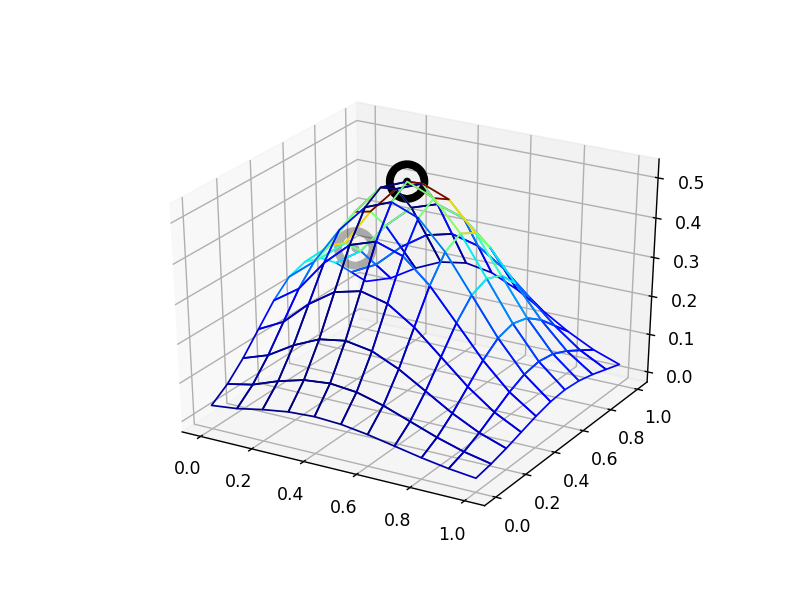

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(px, py, vm.sample_vector_magnitudes(), marker='o', color='black', linewidths=20)

vx = np.linalg.norm(vm._unscaled_velocity_func()(x), axis=0)

# Normalize the colors based on Z value
norm = plt.Normalize(vx.min(), vx.max())
colors = cm.jet(norm(vx))
surf = ax.plot_surface(x[0], x[1], vm._scaling_func()(x), facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))

In [9]:
rgb_mat = np.array(rgb_square_grid())
rgb_mat.shape

(256, 256, 3)

<IPython.core.display.Javascript object>


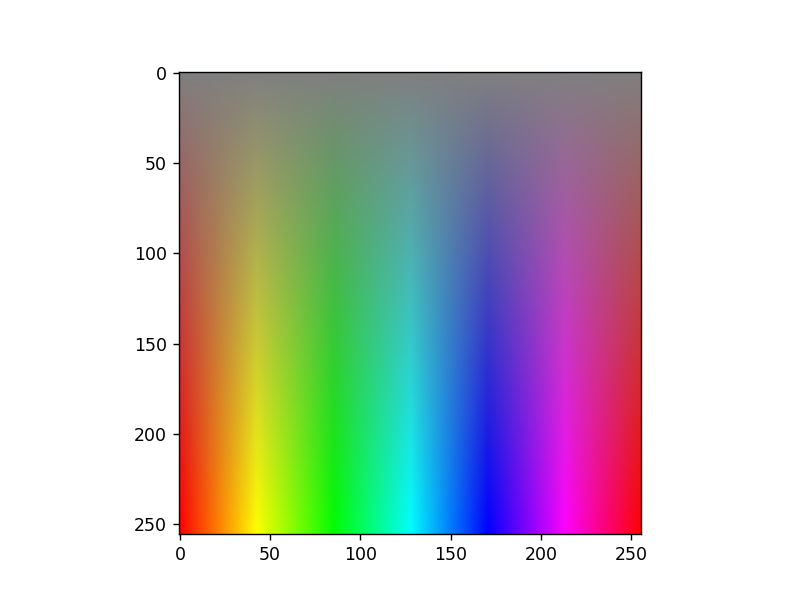

In [10]:
plt.figure()
plt.imshow(rgb_mat)

In [11]:
h1, s1 = np.linspace(0, 1, 256), np.linspace(0, 1, 256)
hs = np.meshgrid(h1, s1)

h, s = (hs - v(hs))
h = (h % 1) * 360

In [12]:
rgb = hsl2rgb(h, s, 0.5)
rgb.shape

rgb1 = hsl2rgb(hs[0]*360, hs[1], 0.5)

<IPython.core.display.Javascript object>


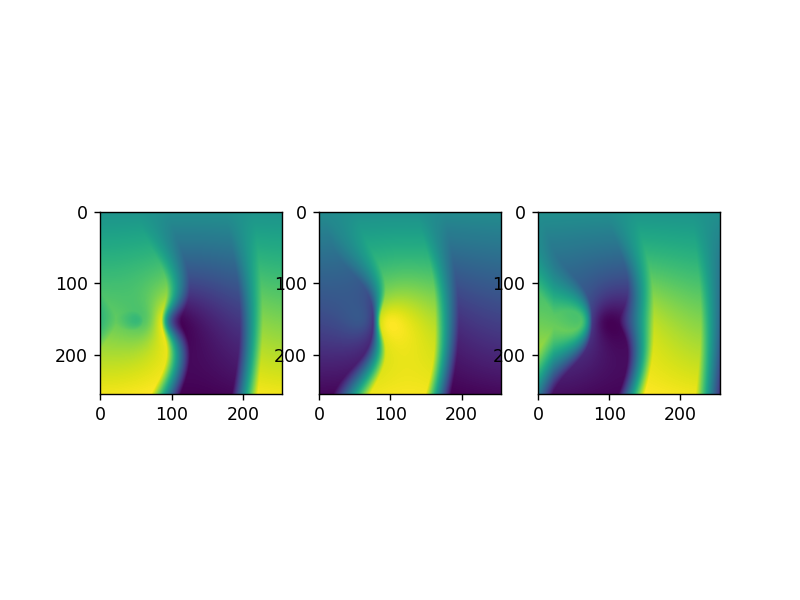

In [13]:
plt.figure()

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(rgb[:, :, i])


<IPython.core.display.Javascript object>


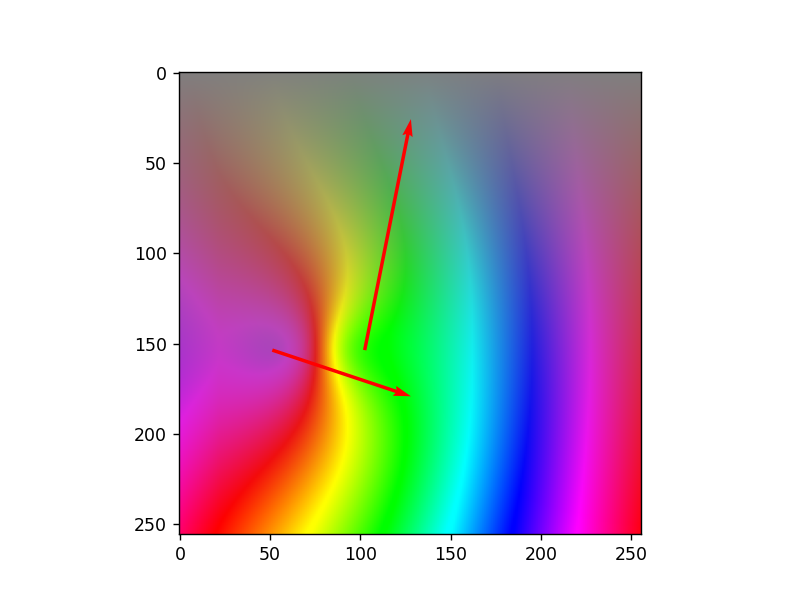

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [14]:
plt.figure()

plt.quiver(px * 256, py * 256, (qx-px) * 256, -(qy-py) * 256, color='red', scale_units='xy', scale=1)

plt.imshow(rgb)

In [19]:
im = np.array(Image.open('lib/images/4xmr5mpelir51.jpg'))
im_hsl = np.array(rgb2hsl(*im.transpose(2, 0, 1)))
im_hsl[0] = im_hsl[0] / 360

In [24]:
im_mapped = map_hsl_image(im_hsl, v)
im_mapped[0] = (im_mapped[0] % 1) * 360
im_mapped.shape

(3, 540, 960)

In [26]:
rgb = hsl2rgb(*im_mapped)
rgb.shape

(540, 960, 3)

<IPython.core.display.Javascript object>


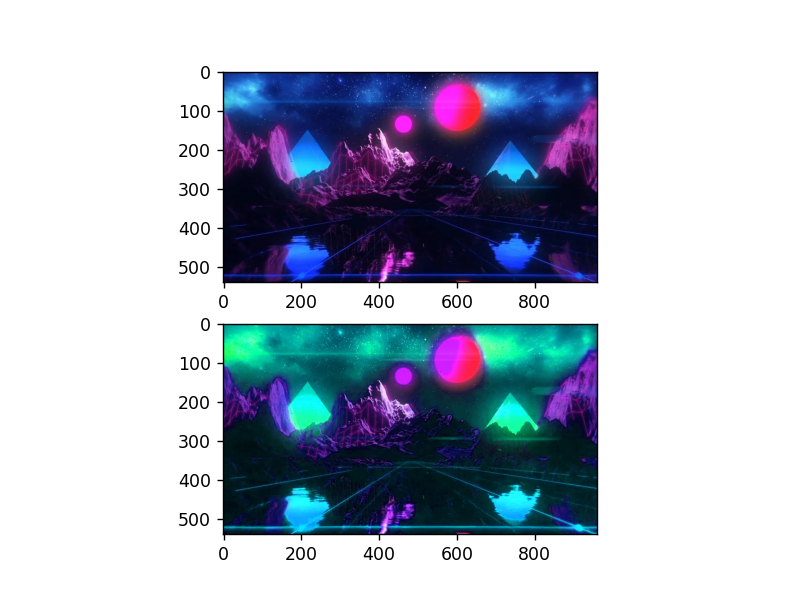

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [28]:
plt.subplot(2, 1, 1)
plt.imshow(im)
plt.subplot(2, 1, 2)
plt.imshow(rgb)